In [1]:
#import relevant libraries and packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report



In [2]:
cols = pd.read_csv('/Users/pree/Desktop/SPAM_classifier/spam.csv',encoding="ISO-8859-1", nrows=1).columns
df = pd.read_csv('/Users/pree/Desktop/SPAM_classifier/spam.csv', usecols=cols,encoding="ISO-8859-1" )
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#drop unwanted columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


#rename columns
df = df.rename(columns={'v1': 'label', 'v2': 'sms'})
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0, 0.5, 'Counts')

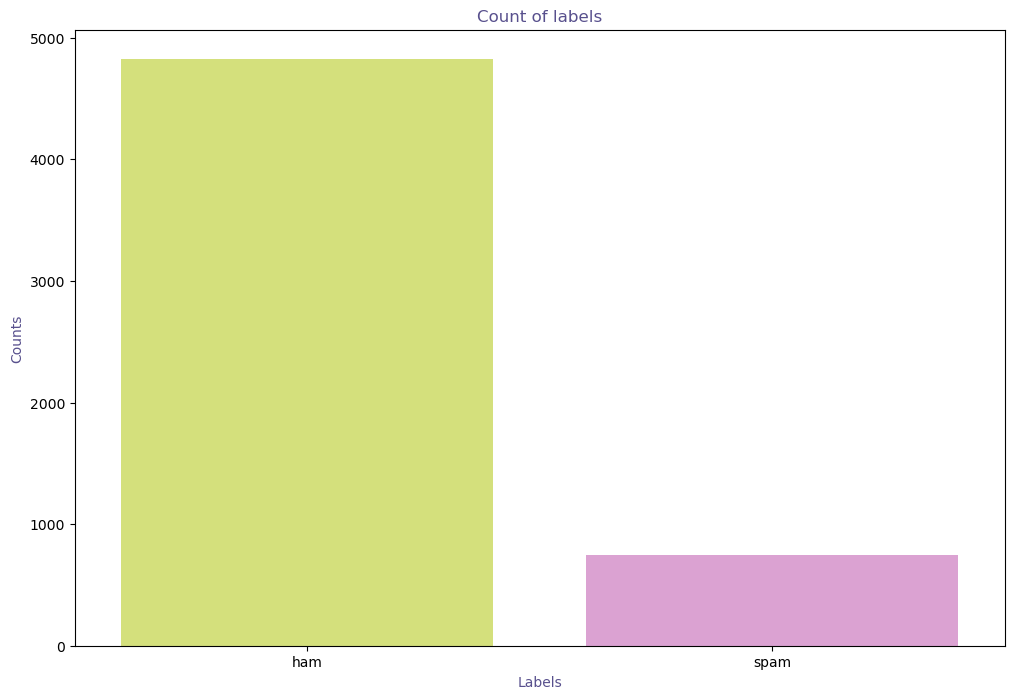

In [6]:
#Palette
cols = ["#E1F16B", "#E598D8"]

#Let's take  a look at the count of our labels and check if there is imbalance between
plt.figure(figsize=(12,8))
fg = sns.countplot(x= df["label"], palette= cols)
fg.set_title("Count of labels", color="#58508d")
fg.set_xlabel("Labels", color="#58508d")
fg.set_ylabel("Counts", color="#58508d")

Observation: The countplot clearly shows imbalance of data

Data exploration: We will first use NLP to assess the sms text and create some new columns like number of characters, number of words and number of sentences.

In [7]:
#Adding new columns
df['num_characters'] = df['sms'].str.len()
df['num_words'] = df.apply(lambda row: nltk.word_tokenize(row['sms']), axis=1).apply(len)
df['num_sentences'] = df.apply(lambda row: nltk.sent_tokenize(row['sms']), axis=1).apply(len)

#Leet's take a look at the statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
num_words,5572.0,18.695621,13.742587,1.0,9.0,15.0,27.0,220.0
num_sentences,5572.0,1.970747,1.417778,1.0,1.0,1.0,2.0,28.0


<Figure size 1200x800 with 0 Axes>

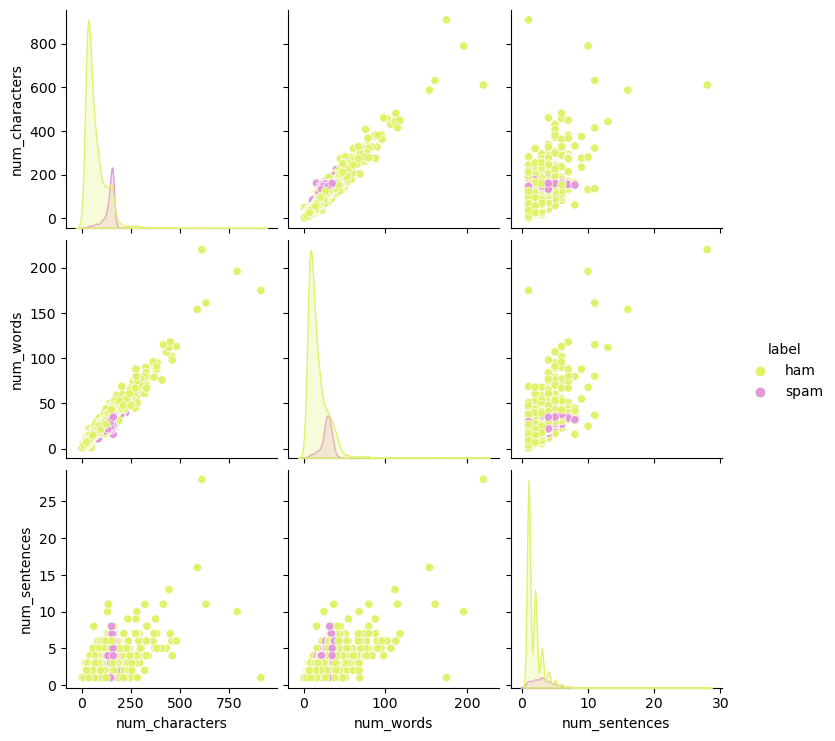

In [8]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=df, hue="label",palette=cols)
plt.show(fg)

Observation: As is seen in the paiplots, we see a few outliers under the ham label. These essentially indicate the length of the sms'.This is interesting as we could put a cap over one of these (perhaps num_characters). We will go ahead and drop these outliers.

In [9]:
#Dropping outliers with a cap of 350
df = df[(df['num_characters'] < 350)]


In [10]:
#Cross-checking
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5548.0,78.368962,52.802290,2.0,35.0,61.0,121.0,338.0
num_words,5548.0,18.259373,11.814699,1.0,9.0,15.0,27.0,90.0
num_sentences,5548.0,1.940339,1.293384,1.0,1.0,1.0,2.0,11.0


<Figure size 1200x800 with 0 Axes>

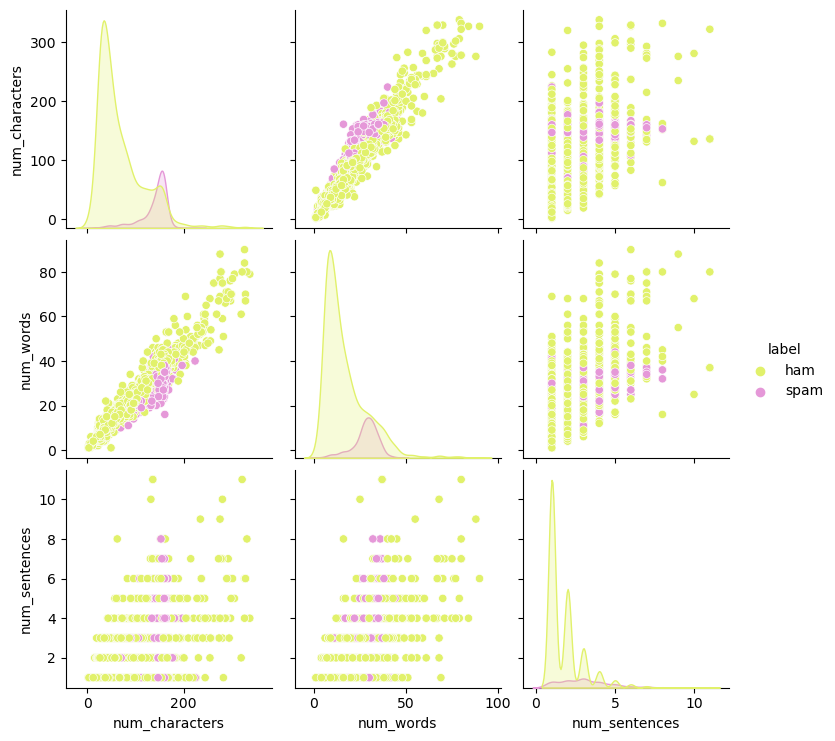

In [11]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=df, hue="label",palette=cols)
plt.show(fg)

againChecking